<a href="https://colab.research.google.com/github/quangduong191/BTAI/blob/main/Phan_biet_10_laoi_trai_cay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tran Quang Duong 19146171
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(150,150,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation ='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        36896     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 41472)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/Phan_biet_10_loai_trai_cay'

/content/drive/MyDrive/Colab Notebooks/Phan_biet_10_loai_trai_cay


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Phan_biet_10_loai_trai_cay/Training_set',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 721 images belonging to 10 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Phan_biet_10_loai_trai_cay/Test_set',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 238 images belonging to 10 classes.


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(training_set,epochs = 100,validation_data=test_set,verbose = 1)

Epoch 1/100
23/23 [==============================] - 59s 3s/step - loss: 1.4972 - accuracy: 0.4702 - val_loss: 1.4435 - val_accuracy: 0.4958
Epoch 2/100
23/23 [==============================] - 58s 3s/step - loss: 1.3767 - accuracy: 0.4840 - val_loss: 1.0763 - val_accuracy: 0.6050
Epoch 3/100
23/23 [==============================] - 59s 3s/step - loss: 1.2405 - accuracy: 0.5395 - val_loss: 0.9529 - val_accuracy: 0.6765
Epoch 4/100
23/23 [==============================] - 59s 3s/step - loss: 1.2243 - accuracy: 0.5534 - val_loss: 0.9490 - val_accuracy: 0.6429
Epoch 5/100
23/23 [==============================] - 59s 3s/step - loss: 1.1515 - accuracy: 0.5839 - val_loss: 0.8368 - val_accuracy: 0.6849
Epoch 6/100
23/23 [==============================] - 60s 3s/step - loss: 1.0647 - accuracy: 0.5992 - val_loss: 0.8052 - val_accuracy: 0.7017
Epoch 7/100
23/23 [==============================] - 60s 3s/step - loss: 1.0583 - accuracy: 0.6117 - val_loss: 0.8124 - val_accuracy: 0.7017
Epoch 8/100
2

In [ ]:
training_set.class_indices

{'Chuoi': 0,
 'Dau_tay': 1,
 'Luu': 2,
 'Nho_My': 3,
 'Thanh_long': 4,
 'Vai_thue': 5,
 'Vu_sua': 6,
 'Xoai': 7,
 'cherry': 8,
 'kiwi': 9}

In [ ]:
from keras.models import load_model
model.save('Final.h5')
model_CNN = load_model('Final.h5')

array([2])

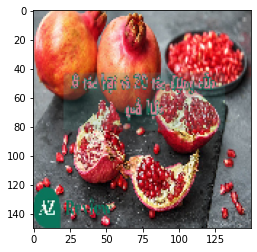

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/Phan_biet_10_loai_trai_cay/Test_set/Luu/(39).jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

array([4])

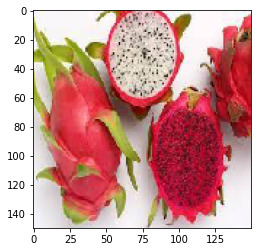

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/Phan_biet_10_loai_trai_cay/Test_set/Thanh_long/Thanh_long (54).jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

array([0])

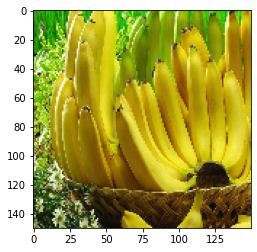

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/11.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Phan_biet_10_laoi_trai_cay.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-05-21 02:11:01--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-21 02:11:01 (25.1 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Phan_biet_10_laoi_trai_cay.ipynb to pdf
[NbConvertApp] Support files will be in Phan_biet_10_laoi_trai_cay_files/
[NbConvertApp] Making directory ./Phan_biet_10_laoi_trai_cay_fi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'